<a href="https://colab.research.google.com/github/dnlgnwn-wq/IRIS/blob/main/BungaIrisdnl_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# IMPORT LIBRARY
# ==============================
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
file_path = "/content/iris.csv"
data = pd.read_csv(file_path)

print("=== DATASET IRIS ===")
display(data.head())

=== DATASET IRIS ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Pisahkan per spesies
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

# Urutkan dari ukuran terkecil ke terbesar (berdasarkan sepal_length)
setosa_sorted = setosa.sort_values(by='sepal_length', ascending=True)
versicolor_sorted = versicolor.sort_values(by='sepal_length', ascending=True)
virginica_sorted = virginica.sort_values(by='sepal_length', ascending=True)

# Tampilkan jumlah data
print("Jumlah data per spesies:")
print("Setosa     :", len(setosa_sorted))
print("Versicolor :", len(versicolor_sorted))
print("Virginica  :", len(virginica_sorted))

# Tampilkan tabel
print("\n=== IRIS SETOSA (Urut Sepal Length Terkecil → Terbesar) ===")
display(setosa_sorted)

print("\n=== IRIS VERSICOLOR (Urut Sepal Length Terkecil → Terbesar) ===")
display(versicolor_sorted)

print("\n=== IRIS VIRGINICA (Urut Sepal Length Terkecil → Terbesar) ===")
display(virginica_sorted)


Jumlah data per spesies:
Setosa     : 50
Versicolor : 50
Virginica  : 50

=== IRIS SETOSA (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa



=== IRIS VERSICOLOR (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
57,4.9,2.4,3.3,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor
93,5.0,2.3,3.3,1.0,versicolor
98,5.1,2.5,3.0,1.1,versicolor
59,5.2,2.7,3.9,1.4,versicolor
84,5.4,3.0,4.5,1.5,versicolor
80,5.5,2.4,3.8,1.1,versicolor
53,5.5,2.3,4.0,1.3,versicolor
90,5.5,2.6,4.4,1.2,versicolor
81,5.5,2.4,3.7,1.0,versicolor



=== IRIS VIRGINICA (Urut Sepal Length Terkecil → Terbesar) ===


,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica
121,5.6,2.8,4.9,2.0,virginica
113,5.7,2.5,5.0,2.0,virginica
114,5.8,2.8,5.1,2.4,virginica
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica
149,5.9,3.0,5.1,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
138,6.0,3.0,4.8,1.8,virginica
134,6.1,2.6,5.6,1.4,virginica


In [4]:
# Fitur dan label
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "=", label)

Label Mapping:
0 = setosa
1 = versicolor
2 = virginica


In [6]:
print("\n=== Distribusi Sebelum SMOTE ===")
print(pd.Series(y_encoded).value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("\n=== Distribusi Setelah SMOTE ===")
print(pd.Series(y_resampled).value_counts())


=== Distribusi Sebelum SMOTE ===
0    50
1    50
2    50
Name: count, dtype: int64

=== Distribusi Setelah SMOTE ===
0    50
1    50
2    50
Name: count, dtype: int64


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data train:", X_train.shape)
print("Data test :", X_test.shape)

Data train: (120, 4)
Data test : (30, 4)


In [8]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

print("\n=== Training Model ===")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Training selesai dalam {end_time - start_time:.4f} detik")


=== Training Model ===
Training selesai dalam 0.4253 detik


In [9]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print("\n=== HASIL EVALUASI ===")
print(f"Akurasi : {acc * 100:.2f}%")
print(f"AUC     : {auc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))


=== HASIL EVALUASI ===
Akurasi : 100.00%
AUC     : 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    1.0000    1.0000         9
   virginica     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30



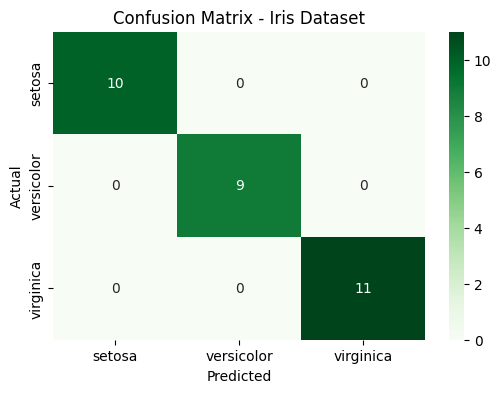

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Iris Dataset")
plt.show()

In [11]:
print("\n=== Prediksi Manual Iris ===")
print("=== UKURAN DALAM CENTIMETER (CM) ===")

sepal_length = float(input("Masukkan sepal length: "))
sepal_width  = float(input("Masukkan sepal width : "))
petal_length = float(input("Masukkan petal length: "))
petal_width  = float(input("Masukkan petal width : "))

# Normalisasi input
input_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Prediksi
pred = model.predict(input_scaled)
pred_label = le.inverse_transform(pred)

print(f"\n Jenis Bunga Iris: {pred_label[0]}")


=== Prediksi Manual Iris ===
=== UKURAN DALAM CENTIMETER (CM) ===
Masukkan sepal length: 1
Masukkan sepal width : 2
Masukkan petal length: 3
Masukkan petal width : 4

 Jenis Bunga Iris: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
# Data hasil akhir dari empat model
data = {
    'Algoritma': ['Naive Bayes', 'Decision Tree', 'Random Forest', 'ANN'],
    'Akurasi (%)': ['96,67 %', '90,00 %', '100 %', '93,33 %'],
    'AUC': [0.990, 0.9250, 1.000, 0.980],
    'Precision': [0.97, 0.90, 1.00, 0.93],
    'Recall': [0.97, 0.90, 1.00, 0.93],
    'F1-Score': [0.96, 0.89, 1.00, 0.93],
    '(Total Data yg diuji) Support': [30, 30, 30, 30],
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Nama Kolom
df.columns = [
    "Algoritma",
    "Akurasi (%)",
    "AUC",
    "Precision",
    "Recall",
    "F1-Score",
    "Support",
]

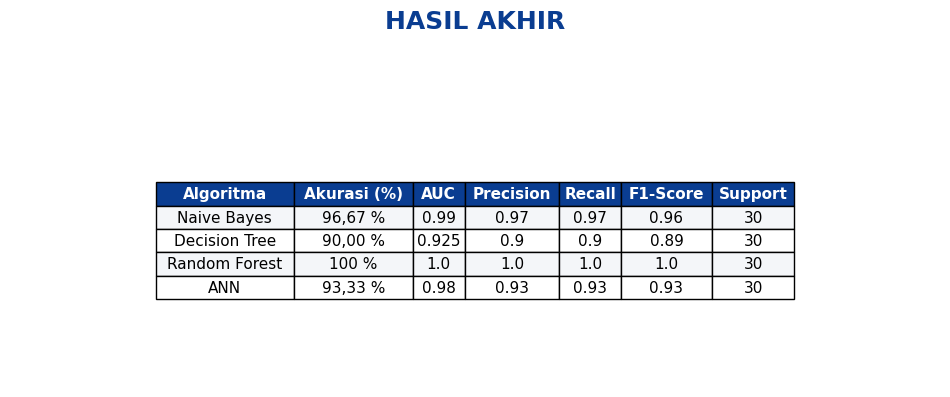

In [18]:
# Visualisasi Tabel Akhir
fig, ax = plt.subplots(figsize=(12, 3.8))   # ✅ dibuat lebih lebar agar kolom muat
ax.axis('off')

# Header Judul
plt.text(
    0.5, 1.25, "HASIL AKHIR",
    ha='center', va='center',
    fontsize=18, fontweight='bold', color='#0A3D91'
)

# Membuat tabel
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Mengatur ukuran tulisan & scaling
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.3, 1.4)        # ✅ kolom lebih lebar & tidak rapat

# Mengatur lebar kolom secara manual (BIAR RAPIH)
# Semakin besar angkanya → semakin lebar kolomnya
col_widths = {
    0: 0.16,   # Algoritma
    1: 0.10,   # Akurasi
    2: 0.10,   # AUC
    3: 0.10,   # Precision
    4: 0.10,   # Recall
    5: 0.14,   # F1-score
    6: 0.15    # Support
}

for col, width in col_widths.items():
    table.auto_set_column_width(col)   # aktifkan auto width
    table._cells[(0, col)].set_width(width)

# Warna header & body
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor('#0A3D91')
        cell.set_text_props(color='white', weight='bold')
    else:
        if row % 2 == 0:
            cell.set_facecolor('#FFFFFF')
        else:
            cell.set_facecolor('#F4F6F9')

# Border tabel luar
for pos in ['top', 'bottom', 'left', 'right']:
    plt.gca().spines[pos].set_color('#0A3D91')
    plt.gca().spines[pos].set_linewidth(6)

plt.show()